In [2]:
pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=09bab3b614ca88e8fa3eccd565f97901e6c24d401c1ec24a0e99afb835fde3c0
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [1]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [2]:
sc = SparkContext()
spark = SparkSession.builder.getOrCreate()

In [3]:
sample_list = [('Mona', 20), ('Jennifer', 34), ('John', 20), ('Jim', 26)]
# Create an RDD from the list
rdd = sc.parallelize(sample_list)
# Create a PySpark DataFrame
names_df = spark.createDataFrame(rdd, schema=['Name', 'Age'])
# Check the type of names_df
print("The type of names_df is", type(names_df))

The type of names_df is <class 'pyspark.sql.dataframe.DataFrame'>


In [5]:
file_path = "datasets/people.csv"
# Create an DataFrame from file_path
people_df = spark.read.csv(file_path, header=True, inferSchema=True)
# Check the type of people_df
print("The type of people_df is", type(people_df))

The type of people_df is <class 'pyspark.sql.dataframe.DataFrame'>


### Transformations and Actions in pyspark dataframe
The most common DataFrame Transformations such as **select, filter, groupby, orderby, dropDuplicates, withColumnRenamed**.
Some common DataFrame Actions such as **printSchema, show, count, columns, and describe**

In [10]:
# Print the first 3 observations
people_df.show(3)
# Count the number of rows
print("There are {} rows in the people_df DataFrame.".format(people_df.count()))
# Count the number of columns and print their names
print("There are {} columns in the people_df DataFrame and their names are {}".format(len(people_df.columns), people_df.columns))

+---+---------+--------------+------+-------------------+
|_c0|person_id|          name|   sex|      date of birth|
+---+---------+--------------+------+-------------------+
|  0|      100|Penelope Lewis|female|1990-08-31 00:00:00|
|  1|      101| David Anthony|  male|1971-10-14 00:00:00|
|  2|      102|     Ida Shipp|female|1962-05-24 00:00:00|
+---+---------+--------------+------+-------------------+
only showing top 3 rows

There are 100000 rows in the people_df DataFrame.
There are 5 columns in the people_df DataFrame and their names are ['_c0', 'person_id', 'name', 'sex', 'date of birth']


In [11]:
# Select name, sex and date of birth columns
people_df_sub = people_df.select('name', 'sex', 'date of birth')
# Print the first 10 observations from people_df_sub
people_df_sub.show(3)
# Remove duplicate entries from people_df_sub
people_df_sub_nodup = people_df_sub.dropDuplicates()
# Count the number of rows
print("There were {} rows before removing duplicates, and {} rows after removing duplicates".format(people_df_sub.count(), people_df_sub_nodup.count()))

+--------------+------+-------------------+
|          name|   sex|      date of birth|
+--------------+------+-------------------+
|Penelope Lewis|female|1990-08-31 00:00:00|
| David Anthony|  male|1971-10-14 00:00:00|
|     Ida Shipp|female|1962-05-24 00:00:00|
+--------------+------+-------------------+
only showing top 3 rows

There were 100000 rows before removing duplicates, and 99998 rows after removing duplicates


In [12]:
# Filter people_df to select females
people_df_female = people_df.filter(people_df.sex == "female")
# Filter people_df to select males
people_df_male = people_df.filter(people_df.sex == "male")
# Count the number of rows
print("There are {} rows in the people_df_female DataFrame and {} rows in the people_df_male DataFrame".format(people_df_female.count(), people_df_male.count()))

There are 49014 rows in the people_df_female DataFrame and 49066 rows in the people_df_male DataFrame


## Pyspark SQL

In [14]:
# Create a temporary table "people"
people_df.createOrReplaceTempView("people")
# Construct a query to select the names of the people from the temporary table "people"
query = '''SELECT name FROM people'''
# Assign the result of Spark's query to people_df_names
people_df_names = spark.sql(query)
# Print the top 10 names of the people
people_df_names.show(10)

+----------------+
|            name|
+----------------+
|  Penelope Lewis|
|   David Anthony|
|       Ida Shipp|
|    Joanna Moore|
|  Lisandra Ortiz|
|   David Simmons|
|   Edward Hudson|
|    Albert Jones|
|Leonard Cavender|
|  Everett Vadala|
+----------------+
only showing top 10 rows



In [15]:
# Filter the people table to select female sex
people_female_df = spark.sql('SELECT * FROM people WHERE sex=="female"')
# Filter the people table DataFrame to select male sex
people_male_df = spark.sql('SELECT * FROM people WHERE sex=="male"')
# Count the number of rows in both people_df_female and people_male_df DataFrames
print("There are {} rows in the people_female_df and {} rows in the people_male_df DataFrames".format(people_female_df.count(), people_male_df.count()))

There are 49014 rows in the people_female_df and 49066 rows in the people_male_df DataFrames


## Pandas DataFrame vs PySpark DataFrame
It is a single machine tool and constrained by single machine limits. So their size is limited by your server memory, and you will process them with the power of a single server. In contrast, operations on Pyspark DataFrames run parallel on different nodes in the cluster. In pandas DataFrames, we get the result as soon as we apply any operation Whereas operations in PySpark DataFrames are lazy in nature. You can change a Pandas DataFrame using methods. We can’t change a PySpark DataFrame due to its immutable property. Finally, the Pandas API supports more operations than PySpark DataFrames.

## Data Visualization with Pyspark

The column names of names_df are ['Name', 'Age']


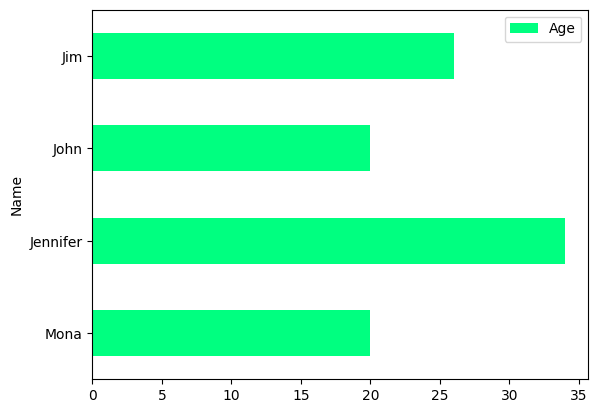

In [17]:
import matplotlib.pyplot as plt

# Check the column names of names_df
print("The column names of names_df are", names_df.columns)
# Convert to Pandas DataFrame
df_pandas = names_df.toPandas()
# Create a horizontal bar plot
df_pandas.plot(kind='barh', x='Name', y='Age', colormap='winter_r')
plt.show()

In [18]:
file_path = "datasets/Fifa2018_dataset.csv"
# Load the Dataframe
fifa_df = spark.read.csv(file_path, header=True, inferSchema=True)
# Check the schema of columns
fifa_df.printSchema()
# Show the first 10 observations
fifa_df.show(3)
# Print the total number of rows
print("There are {} rows in the fifa_df DataFrame".format(fifa_df.count()))

root
 |-- _c0: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Photo: string (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Flag: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Potential: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Club Logo: string (nullable = true)
 |-- Value: string (nullable = true)
 |-- Wage: string (nullable = true)
 |-- Special: integer (nullable = true)
 |-- Acceleration: string (nullable = true)
 |-- Aggression: string (nullable = true)
 |-- Agility: string (nullable = true)
 |-- Balance: string (nullable = true)
 |-- Ball control: string (nullable = true)
 |-- Composure: string (nullable = true)
 |-- Crossing: string (nullable = true)
 |-- Curve: string (nullable = true)
 |-- Dribbling: string (nullable = true)
 |-- Finishing: string (nullable = true)
 |-- Free kick accuracy: string (nullable = true)
 |-- GK diving: string (nullable = true)


In [19]:
# Create a temporary view of fifa_df
fifa_df.createOrReplaceTempView('fifa_df_table')
# Construct the "query"
query = '''SELECT Age FROM fifa_df_table WHERE Nationality == "Germany"'''
# Apply the SQL "query"
fifa_df_germany_age = spark.sql(query)
# Generate basic statistics
fifa_df_germany_age.describe().show()

+-------+-----------------+
|summary|              Age|
+-------+-----------------+
|  count|             1140|
|   mean|24.20263157894737|
| stddev|4.197096712293757|
|    min|               16|
|    max|               36|
+-------+-----------------+



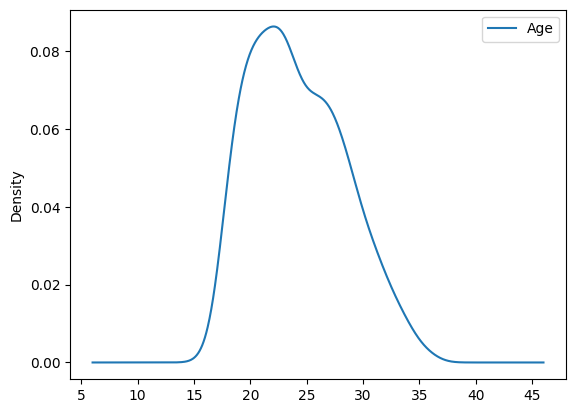

In [20]:
# Convert fifa_df to fifa_df_germany_age_pandas DataFrame
fifa_df_germany_age_pandas = fifa_df_germany_age.toPandas()
# Plot the 'Age' density of Germany Players
fifa_df_germany_age_pandas.plot(kind='density')
plt.show()